In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

# 検量線

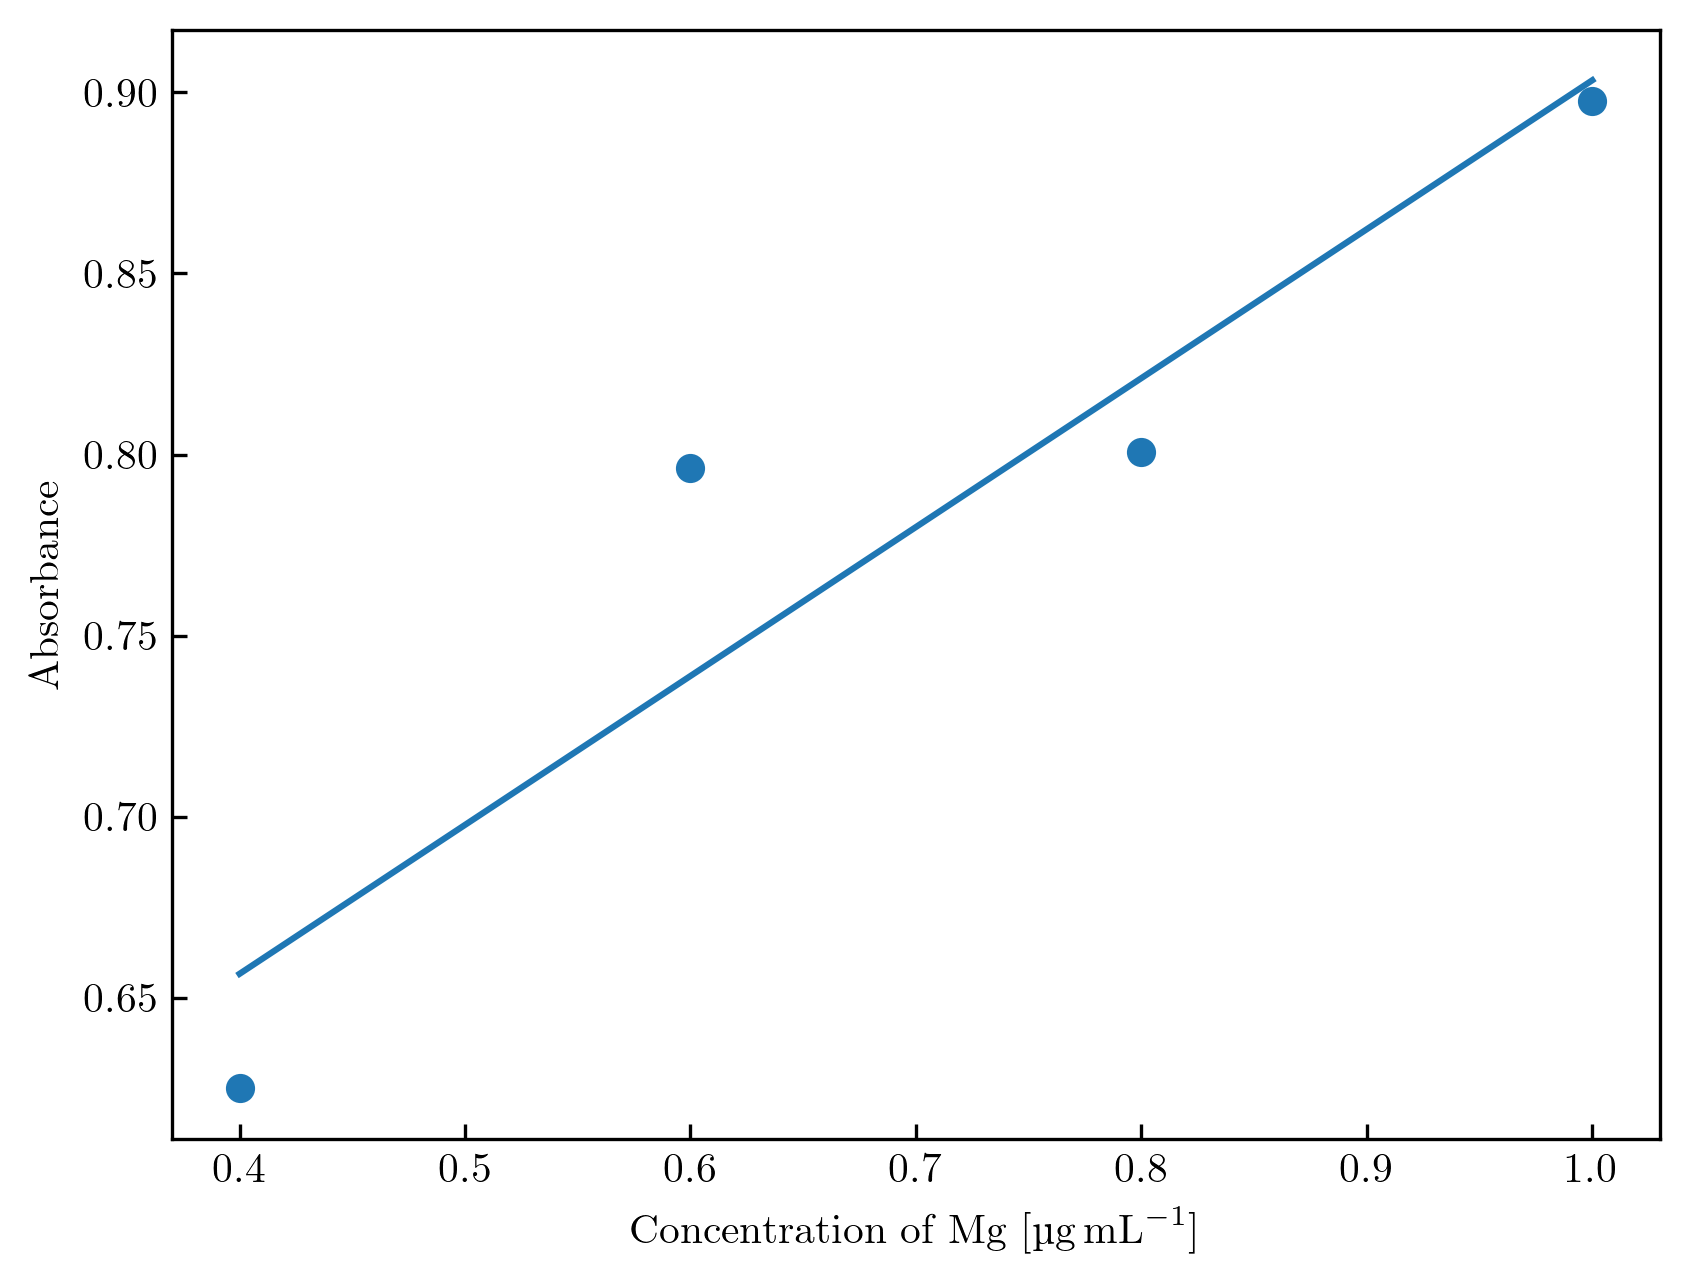

In [104]:
X = np.array([0.4,0.6,0.8,1.0]).reshape(-1,1)
Y = np.array([0.6250,0.7964,0.8008,0.8977]).reshape(-1,1)
sample = np.array([0.6691,0.8933])

plt.rcParams['font.family'] = 'cm'

model = LinearRegression().fit(X,Y)
pred_Y = model.predict(X)

plt.figure(dpi=300)
plt.scatter(X,Y)
plt.plot(X,pred_Y)

plt.xlabel(r"Concentration of Mg [\si{\micro\gram\per\milli\liter}]")
plt.ylabel("Absorbance")

# plt.scatter((np.mean(sample)-model.intercept_)/model.coef_, np.mean(sample))
plt.savefig("cal.pdf")
# (np.mean(sample)-model.intercept_)/model.coef_

# 標準添加法

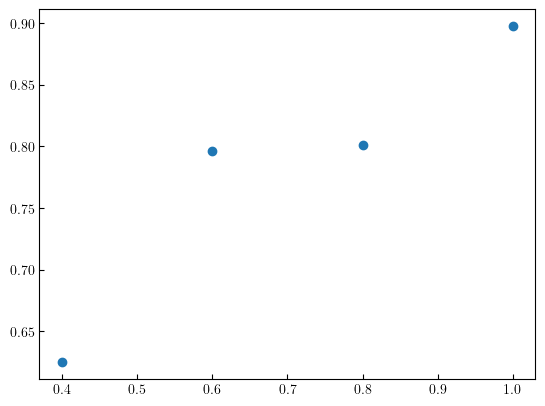

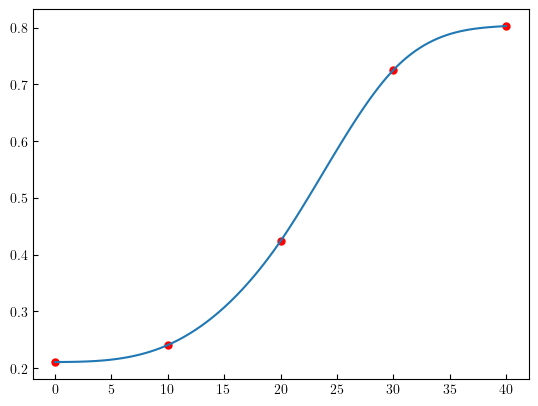

In [37]:

sample = np.mean(np.array([0.2355,0.2504]))

plt.scatter(X,Y)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_smoothing_spline
from scipy.interpolate import make_lsq_spline


x = np.array([5.5e-1, 5.8e-1, 6.1e-1, 6.4e-1,6.5e-1])
y = np.array([1.74e-2, 1.19e-2, 1.69e-2, 2e-2, 4.8e-2])

x = np.array([0,10,20,30,40])
y = np.array([0.2107,0.2407,0.4239,0.7252,0.8029])

w = np.array([1,1e-4,1e-4,1,1])
t = [10,20,30]
k = 2
t = np.r_[(x[0],)*(k+1), t, (x[-1],)*(k+1)]

spl = make_smoothing_spline(x, y, w)
# spl = make_lsq_spline(x,y,t)
xs = np.linspace(np.min(x),np.max(x), 100)

plt.figure()
plt.plot(x, y, 'ro', ms=5, label='data')
plt.plot(xs, spl(xs), label='Smoothing spline')
plt.show()

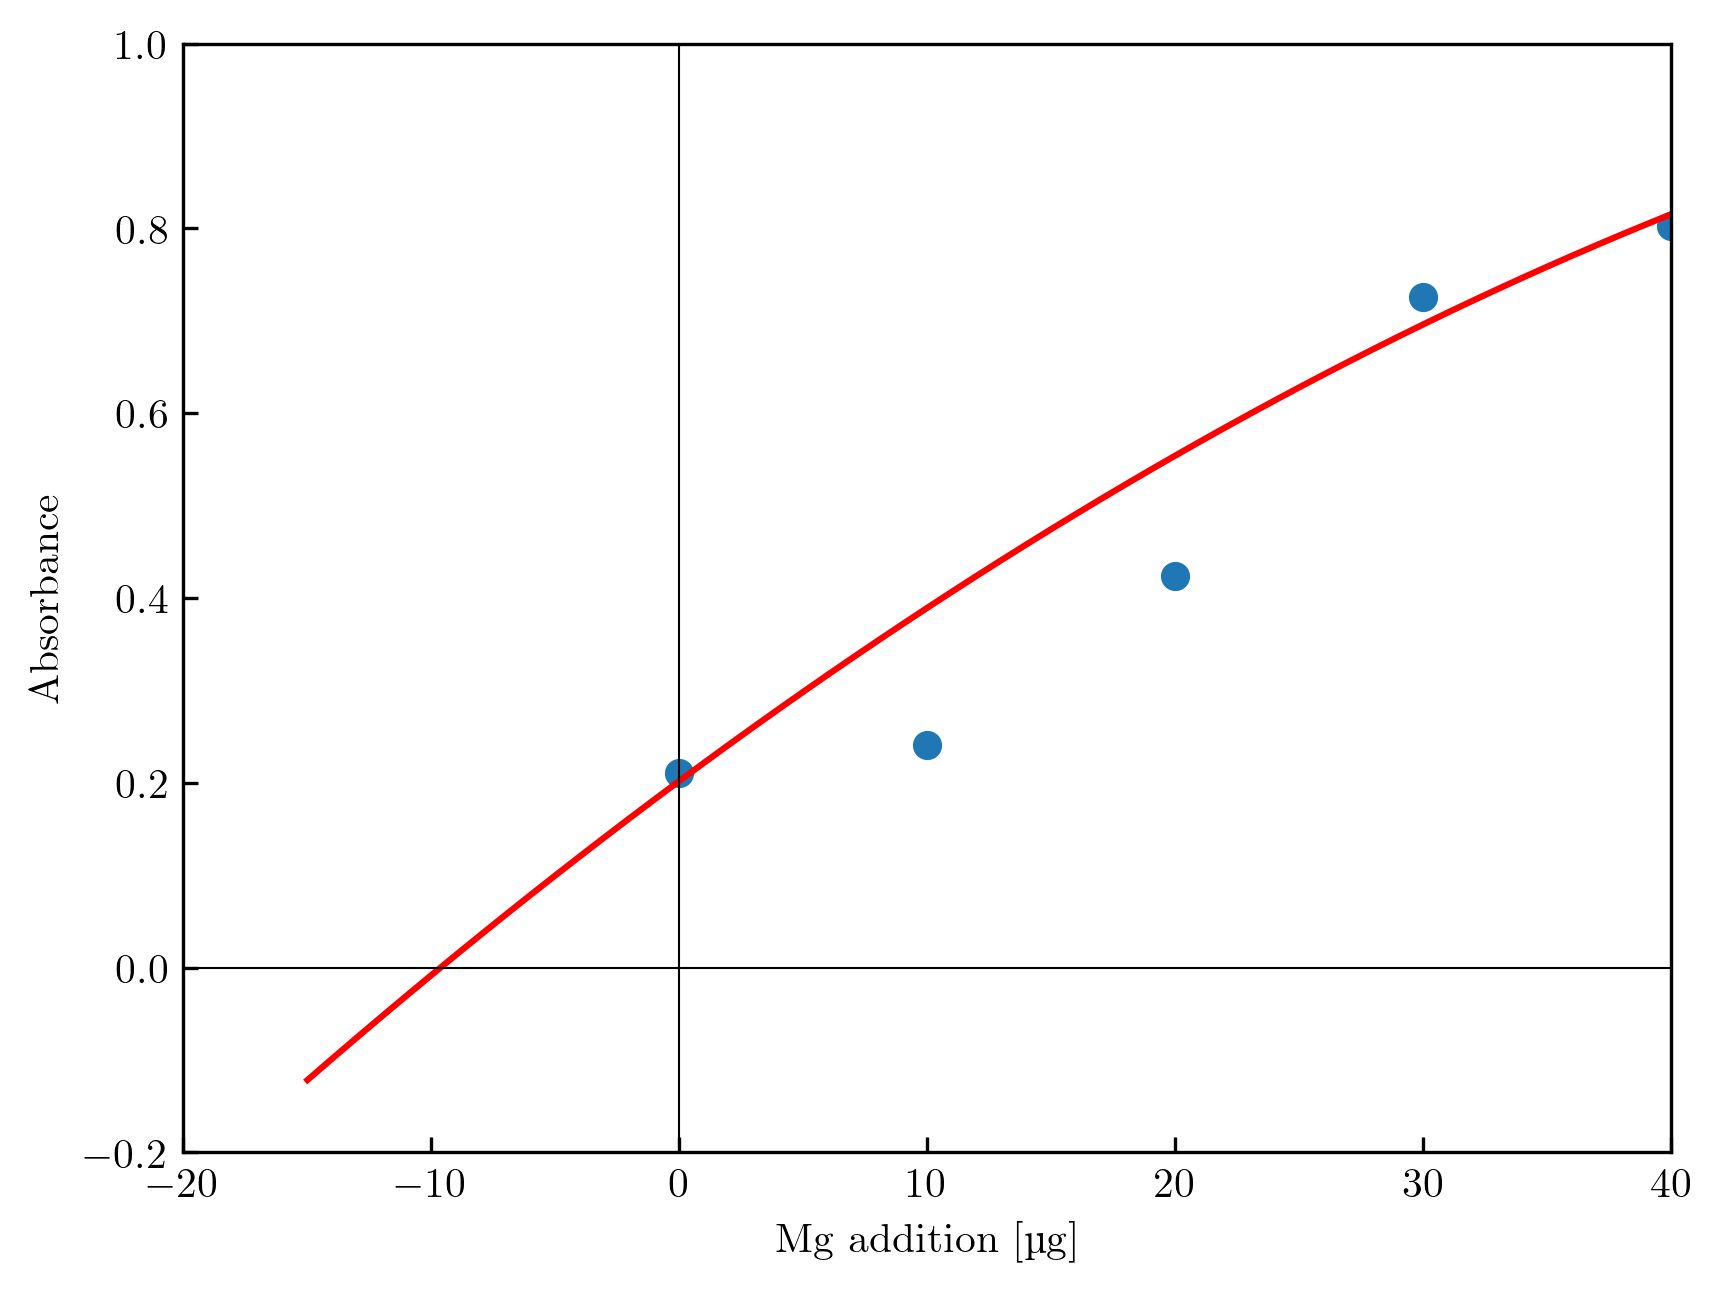

array([-1.13569103e-04,  1.98779268e-02,  2.02050971e-01])

In [108]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 重みつきの多項式モデル
def weighted_polynomial(x, *coefficients):
    return np.polyval(coefficients, x)

# データ生成（適当なデータを使用）
# np.random.seed(42)
# x_data = np.sort(5 * np.random.rand(20))
# y_data = 2 * x_data**2 - 3 * x_data + 1 + np.random.normal(0, 1, len(x_data))

x_data = np.array([0,10,20,30,40])
y_data = np.array([0.2107,0.2407,0.4239,0.7252,0.8029])

# 重みつき最小二乗法のための重み（適当に設定）
weights = np.array([1,0.3,0.3,1,1])

# 初期の多項式係数を適当に設定
initial_guess = np.ones(3)

# 最小二乗法の実行
fit_coefficients, covariance = curve_fit(weighted_polynomial, x_data, y_data, p0=initial_guess, sigma=1/weights)

# プロット
plt.figure(dpi=300)
plt.xlim(-20,40)
plt.ylim(-0.2,1)
plt.scatter(x_data, y_data, label='Data')
# x_range = np.linspace(min(x_data), max(x_data), 100)
x_range = np.arange(-15,45)
plt.plot(x_range, weighted_polynomial(x_range, *fit_coefficients), 'r-', label='Weighted Polynomial Fit')
# plt.legend()
plt.plot((-20,40),(0,0),c="black",lw=0.5)
plt.plot((0,0),(-0.2,1),c="black",lw=0.5)

plt.xlabel(r"Mg addition [\si{\micro\gram}]")
plt.ylabel(r"Absorbance")

plt.savefig("mg.pdf")
plt.show()

# print("Fitted coefficients:", fit_coefficients)
fit_coefficients

In [109]:
def fx(x): 
    return np.polyval(fit_coefficients, x)  #回帰で得た係数からなる多項式をfとし，f(x)を計算
    
def dv(x,h):
    return (fx(x+h)-fx(x-h))/(2*h)


x = 0
for i in range(100): 
    y = fx(x)
    a = dv(x,1e-5)
    b = y-a*x
    x = -b/a
    if abs(fx(x)) < 1e-5:
        break

print(x,fx(x))

-9.63428215854359 -2.353410522015764e-10


In [90]:
def fx(x):
    return x**2-2
def dv(x,h): 
    return (fx(x+h)-fx(x))/h

x = 0
for i in range(100): 
    y = fx(x)
    a = dv(x,1e-5)
    b = y-a*x
    x = -b/a
    if fx(x) < 1e-5:
        break

x,fx(x)

(1.4142145952541363, 2.921429820723631e-06)

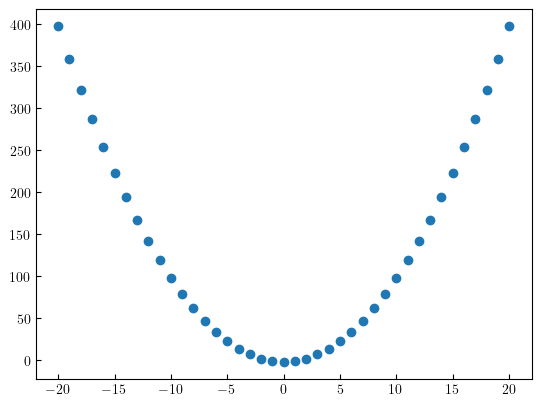

In [80]:
x = np.arange(-20,21)
y = fx(x)

plt.scatter(x,y)